In [28]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [29]:
# Load raw datasets
major_felony_raw = pd.read_csv('seven-major-felony-offenses-2000-2020.csv')
nonmajor_felony_raw = pd.read_csv('non-seven-major-felony-offenses-2000-2020.csv')
misdemeanor_raw = pd.read_csv('misdemeanor-offenses-2000-2020.csv')
violation_raw = pd.read_csv('violation-offenses-2000-2020.csv')

In [30]:
# Cleaning Major Felony Dataset

# Column names did not import properly (they imported as a row in the data), so we renamed the Columns and dropped that row along with NaN values
major_felony = major_felony_raw.copy().drop([0, 1, 2])
new_colnames_major = [i for i in major_felony_raw.iloc[3]]
major_felony.columns = new_colnames_major
major_felony = major_felony.drop([3])

# Drop Statistical Notes and NaN values
major_felony = major_felony.drop([12, 13, 14, 15, 16, 17, 18, 19])

# Drop Columns 2000 - 2009 and 2020
major_felony = major_felony.drop(['2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', 2020.0], axis=1)

# Reset Indeces
major_felony = major_felony.reset_index(drop=True)

# Rename Columns
major_felony = major_felony.rename(columns={"OFFENSE": "offense", '2009': 2009, '2010': 2010, '2011': 2011, '2012': 2012, '2013': 2013, '2014': 2014, '2015': 2015, '2016': 2016, '2017': 2017, '2018': 2018, 2019.0: 2019})

# Make All Data Entries the Same Type (Int)
major_felony[2019.0] = [int(i) for i in major_felony[2019.0]] 
major_felony.iloc[7, 1:11] = [int(i.replace(',', '')) for i in major_felony.iloc[7, 1:11]] 
for x in range(0, 7):
    major_felony.iloc[x, 1:11] = [int(i) for i in major_felony.iloc[x, 1:11]]

# Make Offense Types Lowercase
major_felony.loc[:, "offense"] = major_felony.loc[:, "offense"].str.lower()

# Drop Totals Row 
major_felony = major_felony.drop([7])

# Rename Offenses
major_felony.loc[0, 'offense'] = 'murder'
major_felony.loc[:, 'offense'] = [i.replace(" ","_") for i in major_felony.loc[:, 'offense']]

# Add column "status" (as a felony crime) for later
major_felony['status'] = ['major_felony' for i in major_felony['offense']]

major_felony

,offense,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,status
0,murder,471,536,515,419,335,333,352,335,292,295,319,major_felony
1,rape,1205,1373,1420,1445,1378,1352,1438,1438,1449,1794,1755,major_felony
2,robbery,18601,19486,19717,20144,19128,16539,16931,15500,13956,12913,13371,major_felony
3,felony_assault,16773,16956,18482,19381,20297,20207,20270,20847,20052,20208,20698,major_felony
4,burglary,19430,18600,18720,19168,17429,16765,15125,12990,12083,11687,10783,major_felony
5,grand_larceny,39580,37835,38501,42497,45368,43862,44005,44279,43150,43558,43250,major_felony
6,grand_larceny_of_motor_vehicle,10670,10329,9314,8093,7400,7664,7332,6327,5676,5428,5430,major_felony


In [31]:
# Cleaning NON-Major Felony Dataset

# Column names did not import properly (they imported as a row in the data), so we renamed the Columns and dropped that row along with NaN values
nonmajor_felony = nonmajor_felony_raw.copy().drop([0, 1])
new_colnames_nonmajor = [i for i in nonmajor_felony_raw.iloc[2]]
nonmajor_felony.columns = new_colnames_nonmajor
nonmajor_felony = nonmajor_felony.drop([2])

# Drop Statistical Notes and NaN values
nonmajor_felony = nonmajor_felony.drop([12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31])

# Drop Columns 2000 - 2009 and 2020
nonmajor_felony = nonmajor_felony.drop([2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2020.0], axis=1)

# Reset Indeces
nonmajor_felony = nonmajor_felony.reset_index(drop=True)

# Rename Columns
nonmajor_felony = nonmajor_felony.rename(columns={"OFFENSE": "offense"})
nonmajor_felony = nonmajor_felony.rename(columns={2009.0: 2009, 2010.0: 2010, 2011.0: 2011, 2012.0: 2012, 2013.0: 2013, 2014.0: 2014, 2015.0: 2015, 2016.0: 2016, 2017.0: 2017, 2018.0: 2018, 2019.0: 2019})

# Make All Data Entries the Same Type (Int)
nonmajor_felony[2009] = nonmajor_felony[2009].astype(int)
nonmajor_felony[2010] = nonmajor_felony[2010].astype(int)
nonmajor_felony[2011] = nonmajor_felony[2011].astype(int)
nonmajor_felony[2012] = nonmajor_felony[2012].astype(int)
nonmajor_felony[2013] = nonmajor_felony[2013].astype(int)
nonmajor_felony[2014] = nonmajor_felony[2014].astype(int)
nonmajor_felony[2015] = nonmajor_felony[2015].astype(int)
nonmajor_felony[2016] = nonmajor_felony[2016].astype(int)
nonmajor_felony[2017] = nonmajor_felony[2017].astype(int)
nonmajor_felony[2018] = nonmajor_felony[2018].astype(int)
nonmajor_felony[2019] = nonmajor_felony[2019].astype(int)

# Make Offense Types Lowercase
nonmajor_felony.loc[:, "offense"] = nonmajor_felony.loc[:, "offense"].str.lower()

# Drop Totals Row 
nonmajor_felony = nonmajor_felony.drop([8])

# Rename Offenses
nonmajor_felony.loc[0, 'offense'] = 'stolen property'
nonmajor_felony.loc[1, 'offense'] = 'forgery fraud identity theft'
nonmajor_felony.loc[3, 'offense'] = 'sex crimes'
nonmajor_felony.loc[4, 'offense'] = 'drugs'
nonmajor_felony.loc[5, 'offense'] = 'weapons'
nonmajor_felony.loc[6, 'offense'] = 'criminal mischief'
nonmajor_felony.loc[7, 'offense'] = 'other felonies'
nonmajor_felony.loc[:, 'offense'] = [i.replace(" ","_") for i in nonmajor_felony.loc[:, 'offense']]

# Add column "status" (as a non-major felony crime) for later
nonmajor_felony['status'] = ['nonmajor_felony' for i in nonmajor_felony['offense']]

nonmajor_felony

,offense,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,status
0,stolen_property,823,864,823,711,689,1090,904,769,1019,951,733,nonmajor_felony
1,forgery_fraud_identity_theft,10225,10055,9876,10233,9493,9520,10400,11079,10063,9413,8684,nonmajor_felony
2,arson,1474,1467,1264,1253,1187,1205,1026,802,680,741,711,nonmajor_felony
3,sex_crimes,914,1053,1028,1380,1073,1135,1152,1336,1367,1615,1562,nonmajor_felony
4,drugs,26025,22913,21305,19680,19571,17113,15279,14712,13348,11236,9587,nonmajor_felony
5,weapons,5952,5413,5037,4979,5155,4605,4848,5465,4843,4639,4219,nonmajor_felony
6,criminal_mischief,6397,6006,6374,6737,7468,8466,9253,9966,10073,10427,11302,nonmajor_felony
7,other_felonies,11950,11616,11533,11929,13014,13735,13658,14217,13514,13645,14686,nonmajor_felony


In [32]:
# Cleaning Misdemeanor Dataset

# Column names did not import properly (they imported as a row in the data), so we renamed the Columns and dropped that row along with NaN values
misdemeanor = misdemeanor_raw.copy().drop([0, 1])
new_colnames_misdemeanor = [i for i in misdemeanor_raw.iloc[2]]
misdemeanor.columns = new_colnames_misdemeanor
misdemeanor = misdemeanor.drop([2])

# Drop Statistical Notes and NaN values
misdemeanor = misdemeanor.drop([21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40])

# Drop Columns 2000 - 2009 and 2020
misdemeanor = misdemeanor.drop([2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2020.0], axis=1)

# Reset Indeces
misdemeanor = misdemeanor.reset_index(drop=True)

# Rename Columns
misdemeanor = misdemeanor.rename(columns={"OFFENSE": "offense"})
misdemeanor = misdemeanor.rename(columns={2009.0: 2009, 2010.0: 2010, 2011.0: 2011, 2012.0: 2012, 2013.0: 2013, 2014.0: 2014, 2015.0: 2015, 2016.0: 2016, 2017.0: 2017, 2018.0: 2018, 2019.0: 2019})

# Make All Data Entries the Same Type (Int)
misdemeanor[2009] = misdemeanor[2009].astype(int)
misdemeanor[2010] = misdemeanor[2010].astype(int)
misdemeanor[2011] = misdemeanor[2011].astype(int)
misdemeanor[2012] = misdemeanor[2012].astype(int)
misdemeanor[2013] = misdemeanor[2013].astype(int)
misdemeanor[2014] = misdemeanor[2014].astype(int)
misdemeanor[2015] = misdemeanor[2015].astype(int)
misdemeanor[2016] = misdemeanor[2016].astype(int)
misdemeanor[2017] = misdemeanor[2017].astype(int)
misdemeanor[2018] = misdemeanor[2018].astype(int)
misdemeanor[2019] = misdemeanor[2019].astype(int)

# Make Offense Types Lowercase
misdemeanor.loc[:, "offense"] = misdemeanor.loc[:, "offense"].str.lower()

# Drop Totals Row 
misdemeanor = misdemeanor.drop([17])

# Rename Offenses
misdemeanor.loc[0, 'offense'] = 'stolen property'
misdemeanor.loc[1, 'offense'] = 'sex crimes'
misdemeanor.loc[2, 'offense'] = 'drugs'
misdemeanor.loc[3, 'offense'] = 'weapons'
misdemeanor.loc[5, 'offense'] = 'assault3'
misdemeanor.loc[6, 'offense'] = 'dui'
misdemeanor.loc[8, 'offense'] = 'criminal mischief'
misdemeanor.loc[9, 'offense'] = 'trespass'
misdemeanor.loc[10, 'offense'] = 'unauthorized use of vehicle'
misdemeanor.loc[11, 'offense'] = 'offenses against person'
misdemeanor.loc[12, 'offense'] = 'offenses against public administration'
misdemeanor.loc[13, 'offense'] = 'administrative code'
misdemeanor.loc[14, 'offense'] = 'fraud'
misdemeanor.loc[15, 'offense'] = 'aggravated harassment'
misdemeanor.loc[16, 'offense'] = 'other'
misdemeanor.loc[:, 'offense'] = [i.replace(" ","_") for i in misdemeanor.loc[:, 'offense']]

# Add column "status" (as a misdemeanor) for later
misdemeanor['status'] = ['misdemeanor' for i in misdemeanor['offense']]

misdemeanor

,offense,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,status
0,stolen_property,2023,2240,2853,2662,2337,1469,1145,932,957,835,679,misdemeanor
1,sex_crimes,4459,4512,4632,4480,4064,4246,4555,4947,5424,5827,5805,misdemeanor
2,drugs,79302,79908,80462,67898,55529,52835,38471,35982,33686,19943,10854,misdemeanor
3,weapons,8367,8716,8601,7136,6522,6166,5685,5006,3844,3259,2078,misdemeanor
4,petit_larceny,80928,81522,81160,82947,85602,85121,81598,81274,83569,86489,89314,misdemeanor
5,assault3,50216,52716,50972,54495,53738,53847,42654,42422,41665,43126,42529,misdemeanor
6,dui,7700,6691,6027,6723,8238,7875,5933,5964,5652,4987,4369,misdemeanor
7,vehicle_and_traffic_laws,6178,6624,5802,5577,6106,5841,6266,6580,6457,6722,6777,misdemeanor
8,criminal_mischief,45770,44930,42995,41024,36765,38793,39606,38893,39289,36835,35876,misdemeanor
9,trespass,20904,19858,18297,15719,13459,14540,11473,9799,8218,6445,5405,misdemeanor


In [49]:
# Cleaning Violation Dataset

# Column names did not import properly (they imported as a row in the data), so we renamed the Columns and dropped that row along with NaN values
violation = violation_raw.copy().drop([0, 1])
new_colnames_violation = [i for i in violation_raw.iloc[2]]
violation.columns = new_colnames_violation
violation = violation.drop([2])

# Drop Statistical Notes and NaN values
violation = violation.drop([6, 7, 8, 9, 10, 11, 12, 13, 14, 15])

# Drop Columns 2000 - 2009 and 2020
violation = violation.drop([2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2020.0], axis=1)

# Reset Indeces
violation = violation.reset_index(drop=True)

# Rename Columns
violation = violation.rename(columns={"OFFENSE": "offense"})
violation = violation.rename(columns={2009.0: 2009, 2010.0: 2010, 2011.0: 2011, 2012.0: 2012, 2013.0: 2013, 2014.0: 2014, 2015.0: 2015, 2016.0: 2016, 2017.0: 2017, 2018.0: 2018, 2019.0: 2019})

# Make All Data Entries the Same Type (Int)
violation[2009] = violation[2009].astype(int)
violation[2010] = violation[2010].astype(int)
violation[2011] = violation[2011].astype(int)
violation[2012] = violation[2012].astype(int)
violation[2013] = violation[2013].astype(int)
violation[2014] = violation[2014].astype(int)
violation[2015] = violation[2015].astype(int)
violation[2016] = violation[2016].astype(int)
violation[2017] = violation[2017].astype(int)
violation[2018] = violation[2018].astype(int)
violation[2019] = violation[2019].astype(int)

# Make Offense Types Lowercase
violation.loc[:, "offense"] = violation.loc[:, "offense"].str.lower()

# Drop Totals Row 
violation = violation.drop([2])

# Rename Offenses
violation.loc[0, 'offense'] = 'harassment'
violation.loc[1, 'offense'] = 'other'

# Add column "status" (as a violation) for later
violation['status'] = ['violation' for i in violation['offense']]

violation

,offense,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,status
0,harassment,58600,57376,54216,57045,57654,61972,62121,65938,66522,70421,72031,violation
1,other,5094,4291,4582,4086,3383,3125,2213,1661,1532,1100,1446,violation


In [51]:
# Combine the four datasets

crime_data = major_felony.copy().append(nonmajor_felony.copy(), ignore_index = True)
crime_data = crime_data.append(misdemeanor.copy(), ignore_index = True)
crime_data = crime_data.append(violation.copy(), ignore_index = True)

crime_data

,offense,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,status
0,murder,471,536,515,419,335,333,352,335,292,295,319,major_felony
1,rape,1205,1373,1420,1445,1378,1352,1438,1438,1449,1794,1755,major_felony
2,robbery,18601,19486,19717,20144,19128,16539,16931,15500,13956,12913,13371,major_felony
3,felony_assault,16773,16956,18482,19381,20297,20207,20270,20847,20052,20208,20698,major_felony
4,burglary,19430,18600,18720,19168,17429,16765,15125,12990,12083,11687,10783,major_felony
5,grand_larceny,39580,37835,38501,42497,45368,43862,44005,44279,43150,43558,43250,major_felony
6,grand_larceny_of_motor_vehicle,10670,10329,9314,8093,7400,7664,7332,6327,5676,5428,5430,major_felony
7,stolen_property,823,864,823,711,689,1090,904,769,1019,951,733,nonmajor_felony
8,forgery_fraud_identity_theft,10225,10055,9876,10233,9493,9520,10400,11079,10063,9413,8684,nonmajor_felony
9,arson,1474,1467,1264,1253,1187,1205,1026,802,680,741,711,nonmajor_felony


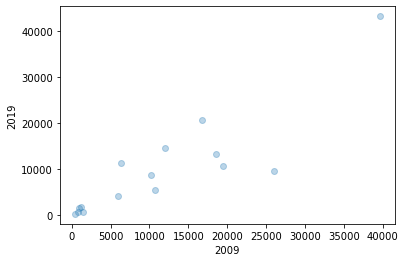

In [26]:
# Exploratory Data Analysis

# Boxplot

# Scatterplot
plt.scatter(felony_data[2009], felony_data[2019], alpha=0.3)
plt.xlabel('2009')
plt.ylabel('2019')
plt.show()